To identify the variability in price differentials among different genres.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/final_0_80509.csv")
df = df[['Initial_Price', 'Final_Price', 'Genres']]
df = df.dropna(how='any')
df


C:\Users\Kiyo\AppData\Local\Temp\ipykernel_4416\670989692.py:4: DtypeWarning: Columns (10,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/final_0_80509.csv")


,Initial_Price,Final_Price,Genres
1,52.0,52.0,"['Action', 'Indie']"
2,199.0,199.0,"['Action', 'Adventure', 'Indie', 'Strategy']"
4,0.0,0.0,"['Adventure', 'Indie']"
5,0.0,0.0,"['Adventure', 'Casual', 'Free to Play', 'Massi..."
6,530.0,530.0,"['Indie', 'Strategy']"
...,...,...,...
80505,570.0,285.0,"['Action', 'Casual', 'Indie', 'Racing', 'Simul..."
80506,300.0,36.0,"['Racing', 'Simulation']"
80507,450.0,360.0,"['Adventure', 'Indie', 'RPG', 'Strategy']"
80508,1199.0,1199.0,"['Action', 'Free to Play', 'Massively Multipla..."


In [26]:
genre_total_initial_prices = {}
genre_total_final_prices = {}

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    genres = eval(row['Genres'])  # Convert string representation of list to actual list

    # Iterate through each genre in the list
    for genre in genres:
        # Update dictionaries with genre as key and add initial/final price to the total
        if pd.notna(row['Initial_Price']):
            genre_total_initial_prices[genre] = genre_total_initial_prices.get(genre, 0) + float(row['Initial_Price'])

        if pd.notna(row['Final_Price']):
            genre_total_final_prices[genre] = genre_total_final_prices.get(genre, 0) + float(row['Final_Price'])

df_total_initial_prices = pd.DataFrame(list(genre_total_initial_prices.items()), columns=['Genre', 'Total_Initial_Price'])
df_total_final_prices = pd.DataFrame(list(genre_total_final_prices.items()), columns=['Genre', 'Total_Final_Price'])

df_combined = pd.merge(df_total_initial_prices, df_total_final_prices, on='Genre', how='outer')
df_combined


,Genre,Total_Initial_Price,Total_Final_Price
0,Action,10755538.96,10070280.96
1,Indie,13880520.50,13233031.50
2,Adventure,9915620.53,9345444.53
3,Strategy,5261035.96,4962956.96
4,Casual,7783297.93,7403465.93
5,Free to Play,327979.00,325481.00
6,Massively Multiplayer,624778.00,601609.00
7,RPG,5090876.97,4782149.97
8,Simulation,6556231.99,6191995.99
9,Sports,1548977.99,1426184.99


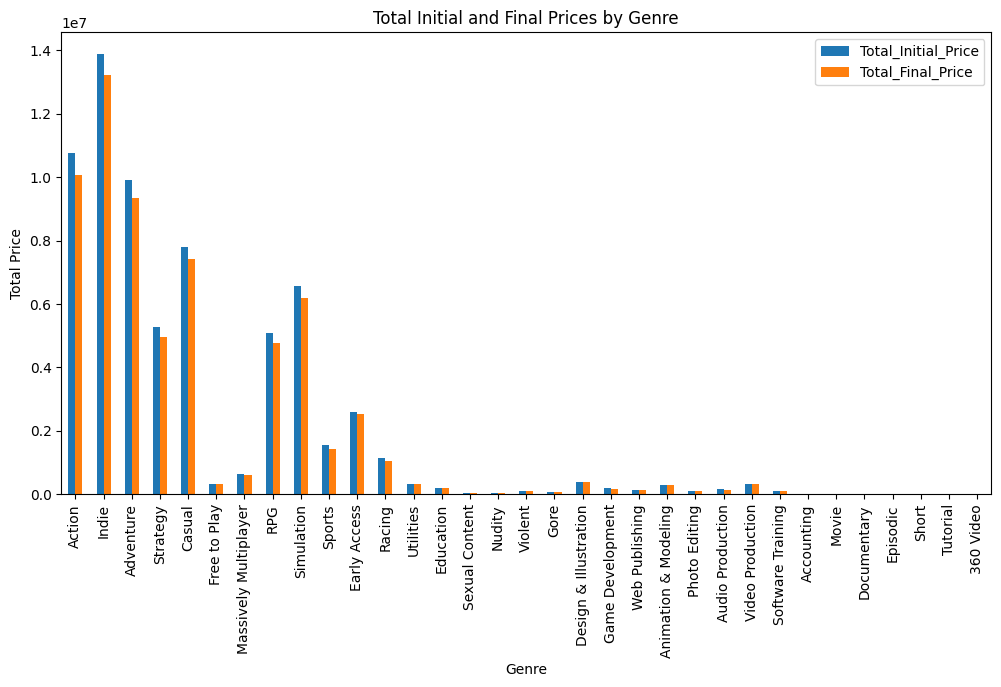

In [40]:
df_combined.plot(x='Genre', y=['Total_Initial_Price', 'Total_Final_Price'], kind='bar', figsize=(12, 6))
plt.title('Total Initial and Final Prices by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Price')
plt.show()


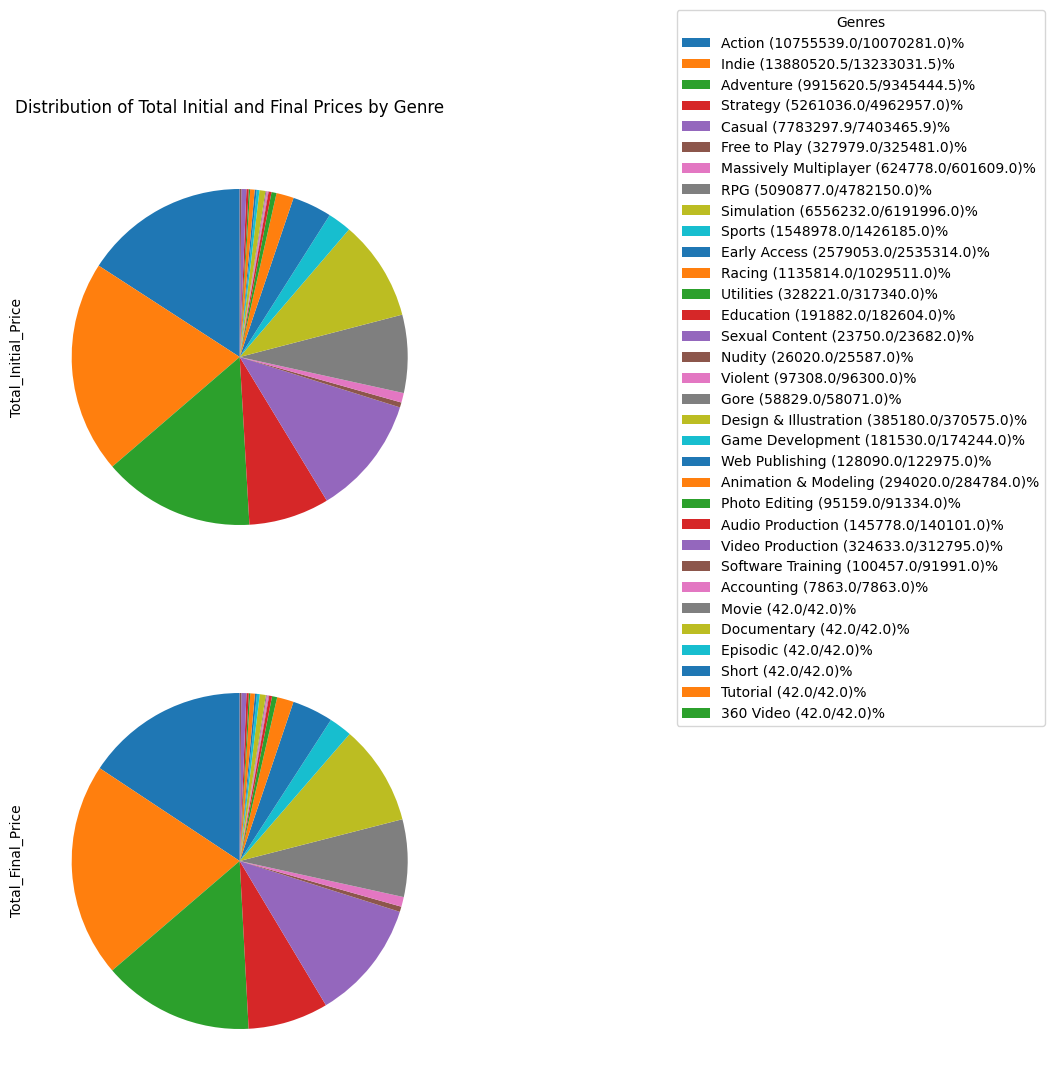

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Pie chart for Total Initial Prices
initial_pie = df_combined.plot.pie(
    y='Total_Initial_Price',
    labels=None,  # Remove labels from the pie itself
    autopct='',
    startangle=90,  # Adjust the starting angle for better alignment
    legend=False,  # Do not display the legend on the pie
    ax=ax1
)

# Pie chart for Total Final Prices
final_pie = df_combined.plot.pie(
    y='Total_Final_Price',
    labels=None,  # Remove labels from the pie itself
    autopct='',
    startangle=90,  # Adjust the starting angle for better alignment
    legend=False,  # Do not display the legend on the pie
    ax=ax2
)

# Create a combined legend with percentages
legend_labels = [f"{genre} ({total_initial:.1f}/{total_final:.1f})%" for genre, total_initial, total_final in zip(df_combined['Genre'], df_combined['Total_Initial_Price'], df_combined['Total_Final_Price'])]
fig.legend(legend_labels, title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Distribution of Total Initial and Final Prices by Genre', y=0.92)
plt.show()
